In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# Normal mode splitting

In this notebook, you will explore the concept of normal mode splitting by performing a numerical eigenvalue analysis of a coupled mass-spring system.

The physical system we will consider is two mass-spring resonators that are coupled together by a third "coupling" spring:

<img src="attachment:normal_mode_splitting-01.png" width=40%></img>

In this picture, the masses are free only to move in the $x$ direction (imagine they are confined to slide on a rail if you want). The displacement of the left and right mass from its equilibrium position is given by $x_1$ and $x_2$ respectively. 

Using Newton's law (see, for example, <a href=http://farside.ph.utexas.edu/teaching/315/Waves/node18.html>here</a>), we can find the following equations of motion for the system:

\begin{eqnarray}
m_1 \ddot x_1 & = & -k_1 x_1 + k_c(x_2 - x_1) \\
m_2 \ddot x_2 & = & -k_2 x_1 + k_c(x_1 - x_2)
\end{eqnarray}

To find the normal modes, we solve these equations considering an oscillating motion of the masses. For this, we will use <a href=https://en.wikipedia.org/wiki/Phasor>phasor notation</a>:

\begin{eqnarray}
x_1(t) & = \tilde x_1 e^{i \omega t} \\
x_2(t) & = \tilde x_2 e^{i \omega t}
\end{eqnarray}

where $\tilde x_n$ is a complex number the specifies the phase and amplitude of the motion of coordinate $n$. Plugging these in to the equations above, we obtain the following equations for $\tilde x_n$: 

\begin{eqnarray}
m_1 \omega^2 \tilde x_1 & = & -k_1 \tilde x_1 + k_c(\tilde x_2 - \tilde x_1) \\
m_2 \omega^2 \tilde x_2 & = & -k_2 \tilde x_2 + k_c(\tilde x_1 - \tilde x_2)
\end{eqnarray}

We can rewrite these in matrix form as follows:

$$
\left(
\begin{array}{cc} 
-(k_1+k_c)/m_1 & k_c/m_1 \\
k_c/m_2 &  -(k_2+k_c)/m_2 \\
\end{array}
\right) 
\left(\begin{array}{c} 
\tilde x_1\\ 
\tilde x_2 
\end{array}\right)
= \omega^2
\left(\begin{array}{c} 
\tilde x_1\\ 
\tilde x_2 
\end{array}\right)
$$ 

We can see that this is an eigenvalue problem:

$$
\mathbf{A} \mathbf{x} = \lambda \mathbf{x}
$$

The eigenvectors specify the relative motion the two masses undergo for a given mode, while the eigenvalues specify the frequencies of the mode: $\lambda = -\omega^2$

Although we can easily do this by hand with a 2x2 matrix, here we will find the eigenvectors and eigenvalues of this matrix numerically and explore what the results give us. 

**Exercise:** Find the eigenvalues and eigenvectors for $m_1 = m_2 = 1$, $k_1 = k_2 = 1$ and $k_c = 0.05$. 

In [2]:
# Solutions

# The values for the calculation
m1 = 1
m2 = 1
k1 = 1
k2 = 1
kc = 0.1

# We will call our matrix "A"
A = np.array([[(k1 + kc)/m1, -kc/m1], [-kc/m2, (k2+kc)/m2]])

# The eigenvalues and eigenvectors 
l, v = np.linalg.eig(A)
w = np.sqrt(l)

for i in range(len(l)):
    print("Eigenvalue  %d: %f" %(i, l[i]))
    print("Frequency   %d: %f" %(i, w[i]))
    print(("Eigenvector %d: " % i) + str(v[:,i]))
    print()

Eigenvalue  0: 1.200000
Frequency   0: 1.095445
Eigenvector 0: [ 0.70710678 -0.70710678]

Eigenvalue  1: 1.000000
Frequency   1: 1.000000
Eigenvector 1: [0.70710678 0.70710678]



We can use the `annotate()` command of matplotlib to plot vectors showing the motions of the masses for each eigevalue:

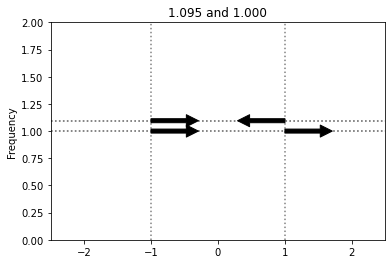

In [3]:
# Your code

def plot_eigenvectors(w, v):    
    fig, ax = plt.subplots()
    for i in range(len(v)):
        ax.axhline(w[i], color='grey', linestyle=':')
        ax.annotate('', xytext=(-1, w[i]),
                    xy=(-1+v[0,i], w[i]), 
                    arrowprops=dict(color='black'))
        ax.axhline(w[i], color='grey', linestyle=':')
        ax.annotate('', xytext=(1, w[i]),
                    xy=(1+v[1,i], w[i]), 
                    arrowprops=dict(color='black'))
    ax.axvline(-1, color='grey', linestyle=':')
    ax.axvline(1, color='grey', linestyle=':')
    plt.ylabel("Frequency")
    plt.title("%.3f and %.3f" % (w[0], w[1]))
    
    # If you draw only arrows, you have to set up the
    # axis limits yourself
    dw = max(w) - min(w)
    ymin = min(w) - dw
    ymax = max(w) + dw
    ax.set_ylim(ymin, ymax)
    ax.set_ylim(0, 2)
    ax.set_xlim(-2.5, 2.5)

plot_eigenvectors(w,v)

We now want to explore what happens to the frequency and motion of the masses as we change the masses and spring constants. We will keep the mass and spring constant of the first mass fixed, and allow the mass and spring constant of the other mass to vary. 

**Exercise:** Write a function to find the normal modes and their frequencies, with `m2`, `k2`, and `kc` as keyword parameters that default to 1, 1, and 0.1 respectively.

```
def find_modes(m2=1, k2=1, kc=0.1):
    ...
    return w, v
```

In [4]:
# Solutions

def find_modes(m2=1, k2=1, kc=0.1):
    m1 = 1; k1 = 1
    A = np.array([[(k1 + kc)/m1, -kc/m1], [-kc/m2, (k2+kc)/m2]])
    l, v = np.linalg.eig(A)
    w = np.sqrt(l)
    return w, v 

v,w = find_modes()

**Exercise:** Make an interactive plot that allows you to adjust the values of $m_2$, $k_2$ and $k_c$ and the plots the eigenvectors as done above. In the title of the plot, indicate the frequencies of the two normal modes. 

In [5]:
# Solutions

def update_plot(m2=1, k2=1, kc=0.1):
    w,v = find_modes(m2,k2,kc)
    plot_eigenvectors(w,v)

interact(update_plot, m2=(0,2,0.1), k2=(0,2,0.1), kc=(0,2,0.05));

interactive(children=(FloatSlider(value=1.0, description='m2', max=2.0), FloatSlider(value=1.0, description='k…

**Exercise:** Make a plot of the eigenfrequencies (the "normal mode spectrum") for $k_c = 0.1$ and varying $k_2$ from 0 to 2 in 100 steps. 

Text(0.5, 0, 'k2')

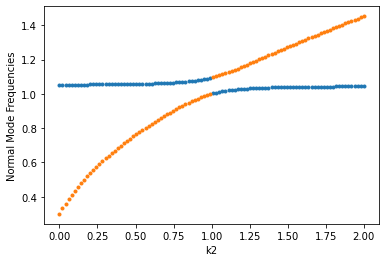

In [6]:
k2vals = np.linspace(0,2,100)

spectrum = []

for k2 in k2vals:
    w,v = find_modes(k2=k2)
    spectrum.append(w)

spectrum = np.array(spectrum)
plt.plot(k2vals, spectrum[:,0], '.')
plt.plot(k2vals, spectrum[:,1], '.')
plt.ylabel("Normal Mode Frequencies")
plt.xlabel("k2")

**Exercise:** Make an interactive plot of the spectrum with sliders that allow you to change the values of `m2`, `k2`, and `kc`.

In [7]:
k2vals = np.linspace(0,2,100)

def update_plot2(m2=1, kc=0.1):
    spectrum = []
    for k2 in k2vals:
        w,v = find_modes(m2=m2, k2=k2, kc=kc)
        spectrum.append(w)
    spectrum = np.array(spectrum)
    plt.plot(k2vals**0.5, spectrum[:,0], '.')
    plt.plot(k2vals**0.5, spectrum[:,1], '.')
    x = plt.xlim()
    plt.plot(x,[1,1],ls=':', c='grey')
    plt.plot([0,1.5],[0,1.5],ls=':', c='grey')
    plt.ylim(0,1.75)
    
interact(update_plot2, m2=(0.1,2,0.1), kc=(0.0,0.5,0.02));

interactive(children=(FloatSlider(value=1.0, description='m2', max=2.0, min=0.1), FloatSlider(value=0.1, descr…